In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
nombre ='/content/2021-10-27-14-29-24-CDT-search-csv-export.csv'
df = pd.read_csv(nombre, sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.dtypes

Page Name                                                                                                              object
User Name                                                                                                              object
Facebook Id                                                                                                             int64
Page Category                                                                                                          object
Page Admin Top Country                                                                                                 object
Page Description                                                                                                       object
Page Created                                                                                                           object
Likes at Posting                                                                                                      

Type
Link                    https://www.facebook.com/105624182802445/posts...
Live Video              https://www.facebook.com/100063763833159/posts...
Live Video Complete     https://www.facebook.com/1908715999353140/post...
Live Video Scheduled    https://www.facebook.com/1575082546067509/post...
Native Video            https://www.facebook.com/327787777325303/posts...
Photo                   https://www.facebook.com/116533631798431/posts...
Status                  https://www.facebook.com/313115126148125/posts...
Video                   https://www.facebook.com/119863604717292/posts...
YouTube                 https://www.facebook.com/1667331773478960/post...
Name: URL, dtype: object


In [ ]:
df['month'] = pd.DatetimeIndex(df['Post Created Date']).month
df['day'] = pd.DatetimeIndex(df['Post Created Date']).day
df['week']= pd.DatetimeIndex(df['Post Created Date']).weekofyear
df['hour']=pd.DatetimeIndex(df['Post Created Time']).hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


# **Línea de tiempo y frecuencia de publicaciones**

La línea de tiempo va desde el 15 de agosto al 27 de octubre del 2021

In [ ]:
min(df['Post Created Date'])

'2021-08-15'

In [ ]:
max(df['Post Created Date'])

'2021-10-27'

Podemos observar la frecuencia de publicaciones por día, sin embargo, podríamos hacerlo por semana o por mes también.

In [ ]:
df_byDate=df.groupby(by=['Post Created Date']).count()
post_byDay=df_byDate['Post Created']
print(post_byDay)

Post Created Date
2021-08-15    2023
2021-08-16    5751
2021-08-17    6760
2021-08-18    7590
2021-08-19    5084
              ... 
2021-10-23    1804
2021-10-24    2146
2021-10-25    4749
2021-10-26    4709
2021-10-27    1813
Name: Post Created, Length: 74, dtype: int64


Haciendo un análisis de la base de datos, observamos que en promedio hay 4054 posts por día, un máximo de 7590 y un mínimo de 1736.

In [ ]:
post_byDay.describe()

count      74.000000
mean     4054.027027
std      1359.556565
min      1736.000000
25%      2791.750000
50%      4306.500000
75%      4868.000000
max      7590.000000
Name: Post Created, dtype: float64

La gráfica general (total) del número de post por día se verá así:

In [ ]:
df_byDate.plot(y='Post Created', use_index=True)

Podemos, sin embargo, hacer un análisis por mes de la frecuencia de publicaciones.

**Frecuencia de publicaciones de agosto**

In [ ]:
df_aug=df[df.month == 8]
df_aug_grouped=df_aug.groupby(by=['day']).count()
df_aug_grouped.plot(y='Post Created', use_index=True)

In [ ]:
df_aug_grouped['Post Created'].describe()

count      17.000000
mean     4447.470588
std      1657.447251
min      2023.000000
25%      2900.000000
50%      4390.000000
75%      5751.000000
max      7590.000000
Name: Post Created, dtype: float64

**Frecuencia de publicaciones de septiembre**

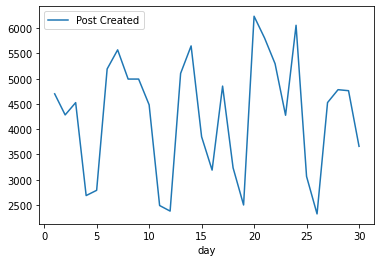

In [ ]:
df_sep=df[df.month == 9]
df_sep_grouped=df_sep.groupby(by=['day']).count()
df_sep_grouped.plot(y='Post Created', use_index=True)

In [ ]:
df_sep_grouped['Post Created'].describe()

count      30.000000
mean     4275.300000
std      1180.572922
min      2324.000000
25%      3202.250000
50%      4526.500000
75%      5076.000000
max      6235.000000
Name: Post Created, dtype: float64

**Frecuencia de publicaciones de octubre**

In [ ]:
df_oct=df[df.month == 10]
df_oct_grouped=df_oct.groupby(by=['day']).count()
df_oct_grouped.plot(y='Post Created', use_index=True)

In [ ]:
df_oct_grouped['Post Created'].describe()

count      27.000000
mean     3560.444444
std      1238.510064
min      1736.000000
25%      2230.000000
50%      3869.000000
75%      4598.000000
max      5740.000000
Name: Post Created, dtype: float64

**Frecuencia de publicaciones por semana**

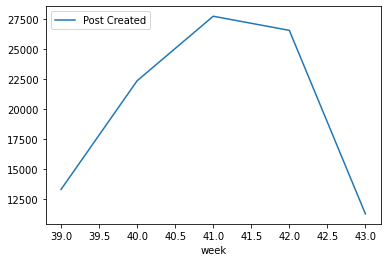

In [ ]:
df_week_grouped=df.groupby(by=['week']).count()
df_week_grouped.plot(y='Post Created', use_index=True)

In [ ]:
df_week_grouped['Post Created'].describe()

count        5.000000
mean     20250.000000
std       7570.404117
min      11271.000000
25%      13309.000000
50%      22366.000000
75%      26564.000000
max      27740.000000
Name: Post Created, dtype: float64

# **Análisis de hora de publicación**

**Post creados por hora:**

In [ ]:
df['hour'] = pd.DatetimeIndex(df['Post Created Time']).hour

In [ ]:
df_hour_grouped=df.groupby(by=['hour']).count()

In [ ]:
df_hour_grouped['Post Created']

hour
0     1064
1      556
2      366
3      229
4      241
5      376
6     1139
7     2823
8     4968
9     6953
10    8029
11    7835
12    7474
13    7364
14    6408
15    5975
16    5567
17    5769
18    5955
19    5738
20    5581
21    4667
22    3756
23    2417
Name: Post Created, dtype: int64

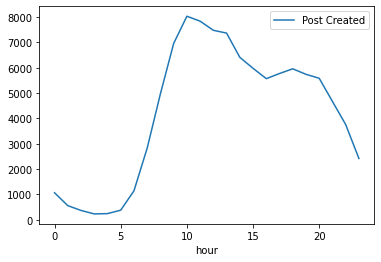

In [ ]:
df_hour_grouped.plot(y='Post Created', use_index=True)

**Suma de reacciones por hora:**

In [ ]:
df_hour_grouped_sum=df.groupby(by=['hour']).sum()

In [ ]:
df_hour_grouped_sum.head()

Facebook Id  Likes at Posting  ...    month      day
hour                                  ...                  
0     1.755042e+18       992634713.0  ...  28835.0  53727.0
1     8.790233e+17       469585234.0  ...  15199.0  28374.0
2     4.396694e+17       359197782.0  ...   8725.0  16481.0
3     2.924978e+17       300989729.0  ...   5652.0  10644.0
4     3.081673e+17       419709574.0  ...   5795.0  10718.0

[5 rows x 18 columns]

**Suma de Likes por hora**

In [ ]:
df_hour_grouped_sum['Likes'].sort_values(ascending=False)

hour
11    343589
10    321166
13    305974
12    303212
9     288777
19    280038
20    261340
15    256633
17    245957
8     240778
18    238284
14    224670
16    215542
7     205449
21    195457
22    160669
23    100523
6      51098
1      29729
0      27693
4      13935
5       9660
2       5481
3       3468
Name: Likes, dtype: int64

In [ ]:
df_hour_grouped_sum['Likes'].describe()

count        24.000000
mean     180380.083333
std      117019.189793
min        3468.000000
25%       45755.750000
50%      220106.000000
75%      266014.500000
max      343589.000000
Name: Likes, dtype: float64

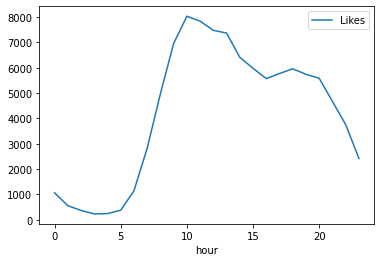

In [ ]:
df_hour_grouped.plot(y='Likes', use_index=True)


**Likes Per Post:**

In [ ]:
df_merge= df_hour_grouped_sum.merge(df_hour_grouped['Post Created'],on='hour')
df_merge['Likes per post']=df_merge['Likes']/df_merge['Post Created']
df_merge['Likes per post'].sort_values(ascending=False)


hour
7     72.776833
4     57.821577
1     53.469424
19    48.804113
8     48.465781
20    46.826734
6     44.862160
11    43.853095
15    42.951130
22    42.776624
17    42.634252
21    41.880651
23    41.589988
13    41.549973
9     41.532720
12    40.568906
18    40.014106
10    40.000747
16    38.717801
14    35.060861
0     26.027256
5     25.691489
3     15.144105
2     14.975410
Name: Likes per post, dtype: float64

In [ ]:
df_merge['Likes per post'].describe()

count    24.000000
mean     41.166489
std      12.299745
min      14.975410
25%      39.680011
50%      41.735319
75%      45.353303
max      72.776833
Name: Likes per post, dtype: float64

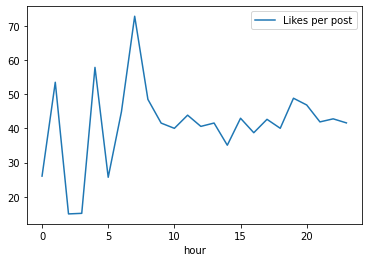

In [ ]:
df_merge.plot(y='Likes per post', use_index=True)

**Total Views per hour:**

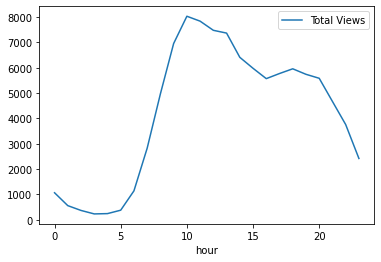

In [ ]:
df_hour_grouped.plot(y='Total Views', use_index=True)

In [ ]:
df_hour_grouped_sum['Total Views'].sort_values(ascending=False)

hour
7     44792564
8     25219271
20    17541465
10    15553949
15    13710582
9     12165430
11    10362636
21     7671729
22     6837963
13     6766468
18     6386502
12     5906572
14     5341718
17     5079500
19     5032405
16     2920912
23     2698266
6      2529454
0      1672300
4       448024
2       416110
5       106258
1        80417
3        16167
Name: Total Views, dtype: int64

In [ ]:
df_hour_grouped_sum['Total Views'].describe()

count    2.400000e+01
mean     8.302361e+06
std      1.002867e+07
min      1.616700e+04
25%      2.315166e+06
50%      5.624145e+06
75%      1.081333e+07
max      4.479256e+07
Name: Total Views, dtype: float64

**Correlation Matrix**

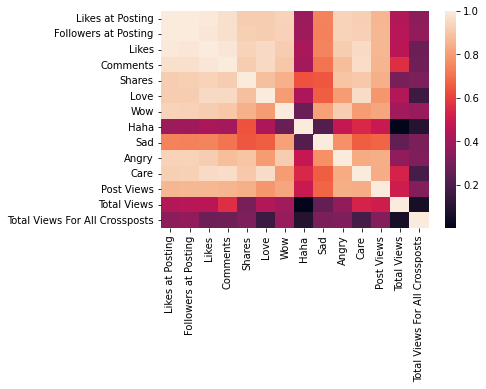

In [ ]:
df_corr=df_hour_grouped_sum.drop(columns=['Facebook Id', 'Sponsor Id', 'day','week', 'month'])
corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=False)
plt.show()

# **Tipo de posteo (comentario, publicación, video, posteo con foto).**

In [ ]:
df_aux_tipo=df[['Post Created','Video Length','Image Text','Link','Sponsor Id', 'Message']]
#Video
df_aux_tipo['Video']=df_aux_tipo['Video Length'].isnull()
df_aux_tipo.loc[df_aux_tipo['Video'] == False, 'Video'] = "Video"
df_aux_tipo.loc[df_aux_tipo['Video'] == True, 'Video'] = ''  
#Image
df_aux_tipo['Image']=df_aux_tipo['Image Text'].isnull()
df_aux_tipo.loc[df_aux_tipo['Image'] == False, 'Image'] = "Image"
df_aux_tipo.loc[df_aux_tipo['Image'] == True, 'Image'] = ''  
#Message
df_aux_tipo['Messages']=df_aux_tipo['Message'].isnull()
df_aux_tipo.loc[df_aux_tipo['Messages'] == False, 'Messages'] = "Message"
df_aux_tipo.loc[df_aux_tipo['Messages'] == True, 'Messages'] = ''  
#Type of post
df_aux_tipo['Tipo']=df_aux_tipo['Image']+df_aux_tipo['Messages']+df_aux_tipo['Video']
df_aux_tipo


df_tipo_grouped=df_aux_tipo.groupby(by=['Tipo']).count()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Tipo
                      14332
Image                  7378
ImageMessage          59754
ImageMessageVideo         7
Message              179738
MessageVideo          35336
Video                  3453
Name: Post Created, dtype: int64

In [ ]:
df_tipo_grouped['Post Created'].sort_values(ascending=False)

Tipo
Message              179738
ImageMessage          59754
MessageVideo          35336
                      14332
Image                  7378
Video                  3453
ImageMessageVideo         7
Name: Post Created, dtype: int64

# **Analisis de Usuarios**

In [ ]:
# posts por user
#df.groupby(['User Name']).head()

df_users = df['User Name']
pd.Series(df_users.unique()).count()
df_users.describe()

count           282635
unique           15702
top       COVID19MXSOS
freq               852
Name: User Name, dtype: object

In [ ]:
frecuencias = df_users.value_counts()
frecuencias.describe()

count    15702.000000
mean        17.999936
std         41.559289
min          1.000000
25%          1.000000
50%          3.000000
75%         14.000000
max        852.000000
Name: User Name, dtype: float64

In [ ]:
# numero de cuentas que publican mas que el promedio
frecuencias[frecuencias>frecuencias.mean()].count()

3490

In [ ]:
# numero de cuentas que publican 1 sola vez
frecuencias[frecuencias==1].count() 

5178

## **Análisis de usuarios vs. frecuencia de publicación vs. tiempo**

In [ ]:
df_byUserName=df.groupby(by=['User Name', 'Post Created Date']).count()
print(df_byUserName['Post Created'])

User Name      Post Created Date
070Informatel  2021-10-03           1
               2021-10-25           1
10.1Tampico    2021-09-29           1
               2021-09-30           1
               2021-10-02           2
                                   ..
zumpangonet    2021-10-07           1
               2021-10-10           1
               2021-10-12           2
               2021-10-14           1
               2021-10-15           1
Name: Post Created, Length: 54526, dtype: int64


In [ ]:
print(df_byUserName['Post Created'].describe())

count    54526.000000
mean         1.748359
std          1.504352
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         40.000000
Name: Post Created, dtype: float64


Revisar qué usuario publicó 40 posts!!

## **Análisis de re-publicaciones (buscar los que vienen de algún grupo o páginas famosas)**

In [ ]:
df_byType=df.groupby(by=['Type']).first()
print(df_byType['URL'])

Type
Link                    https://www.facebook.com/105624182802445/posts...
Live Video              https://www.facebook.com/100063763833159/posts...
Live Video Complete     https://www.facebook.com/1908715999353140/post...
Live Video Scheduled    https://www.facebook.com/1575082546067509/post...
Native Video            https://www.facebook.com/327787777325303/posts...
Photo                   https://www.facebook.com/116533631798431/posts...
Status                  https://www.facebook.com/313115126148125/posts...
Video                   https://www.facebook.com/119863604717292/posts...
YouTube                 https://www.facebook.com/1667331773478960/post...
Name: URL, dtype: object


### **Referencias**


[How do you calculare overperforming scores](https://help.crowdtangle.com/en/articles/2013937-how-do-you-calculate-overperforming-scores)